In [1]:
library(keras)

In [2]:
data(Zoo, package="mlbench")
head(Zoo)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<fct>
aardvark,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,FALSE,FALSE,TRUE,mammal
antelope,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal
bass,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,0,TRUE,FALSE,FALSE,fish
bear,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,FALSE,FALSE,TRUE,mammal
boar,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal
buffalo,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal


In [3]:
Zoo_predictors <- Zoo[,-ncol(Zoo)]
Zoo_class <- Zoo[, ncol(Zoo)]

In [4]:
Zoo_predictors <- normalize(as.matrix(Zoo_predictors))
head(Zoo_predictors)

0.2085144,0,0.0000000,0.2085144,0,0.0000000,0.2085144,0.2085144,0.2085144,0.2085144,0,0.0000000,0.8340577,0.0000000,0,0.2085144
0.2085144,0,0.0000000,0.2085144,0,0.0000000,0.0000000,0.2085144,0.2085144,0.2085144,0,0.0000000,0.8340577,0.2085144,0,0.2085144
0.0000000,0,0.3779645,0.0000000,0,0.3779645,0.3779645,0.3779645,0.3779645,0.0000000,0,0.3779645,0.0000000,0.3779645,0,0.0000000
0.2085144,0,0.0000000,0.2085144,0,0.0000000,0.2085144,0.2085144,0.2085144,0.2085144,0,0.0000000,0.8340577,0.0000000,0,0.2085144
0.2041241,0,0.0000000,0.2041241,0,0.0000000,0.2041241,0.2041241,0.2041241,0.2041241,0,0.0000000,0.8164966,0.2041241,0,0.2041241
0.2085144,0,0.0000000,0.2085144,0,0.0000000,0.0000000,0.2085144,0.2085144,0.2085144,0,0.0000000,0.8340577,0.2085144,0,0.2085144


In [5]:
Zoo_class <- to_categorical(as.integer(Zoo_class)-1L)
head(Zoo_class)

1,0,0,0,0,0,0
1,0,0,0,0,0,0
0,0,0,1,0,0,0
1,0,0,0,0,0,0
1,0,0,0,0,0,0
1,0,0,0,0,0,0


In [6]:
model <- keras_model_sequential()

model %>%
  layer_dense(units = 16, activation = 'relu', input_shape = c(ncol(Zoo_predictors)),
    kernel_regularizer=regularizer_l2(l=0.001)) %>%
  layer_dropout(.1) %>%
  layer_dense(units = 8, activation = 'relu',
    kernel_regularizer=regularizer_l2(l=0.001)) %>%
  layer_dense(units = ncol(Zoo_class), activation = 'softmax')
model

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 16)                      272         
________________________________________________________________________________
dropout (Dropout)                   (None, 16)                      0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 8)                       136         
________________________________________________________________________________
dense_2 (Dense)                     (None, 7)                       63          
Total params: 471
Trainable params: 471
Non-trainable params: 0
________________________________________________________________________________



In [7]:
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = 'adam',
  metrics = 'accuracy'
)

In [8]:
train <- sample(c(TRUE, FALSE), size = nrow(Zoo), prob = c(0.8, 0.2), replace = TRUE)

history <- model %>% fit(
  Zoo_predictors[train,],
  Zoo_class[train,],
  validation_data = list(Zoo_predictors[!train,], Zoo_class[!train,]),
  epochs = 200,
  batch_size = 2^3
)

history

Trained on 77 samples (batch_size=8, epochs=200)
Final epoch (plot to see history):
    loss: 0.222
     acc: 0.974
val_loss: 0.3567
 val_acc: 0.8333 

`geom_smooth()` using formula 'y ~ x'



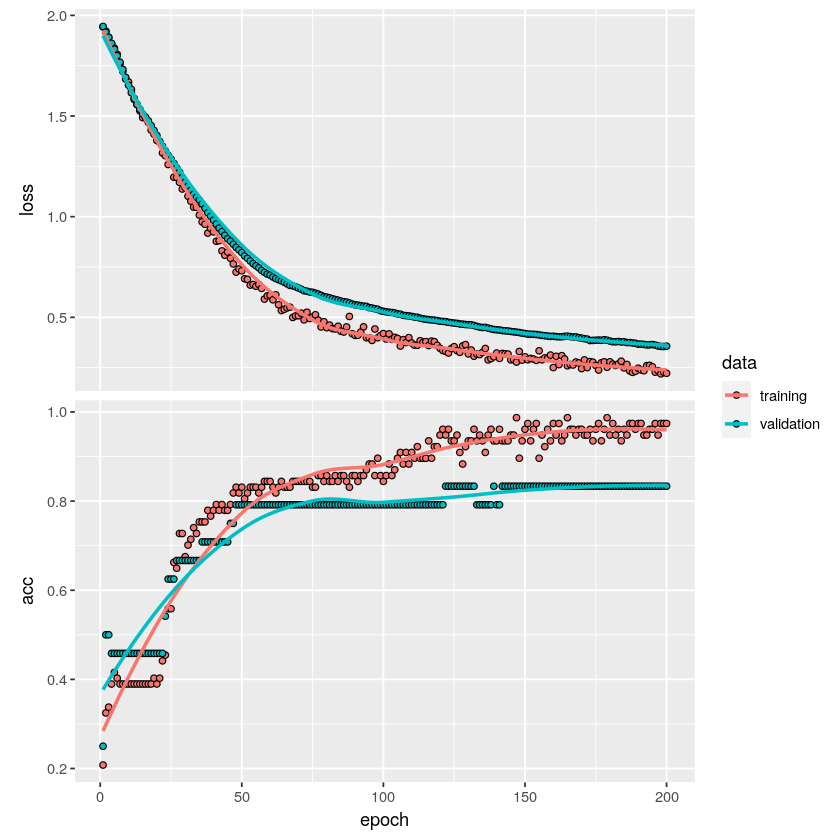

In [9]:
plot(history)

In [10]:
classes <- model %>% predict_classes(Zoo_predictors[!train,], batch_size = 2^7)

library(caret)

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




In [11]:
confusionMatrix(data = factor(classes+1L, levels = 1:length(levels(Zoo$type)), labels = levels(Zoo$type)),
  ref = Zoo$type[!train])

Confusion Matrix and Statistics

               Reference
Prediction      mammal bird reptile fish amphibian insect mollusc.et.al
  mammal            11    0       0    0         0      0             0
  bird               0    2       0    0         0      0             0
  reptile            0    0       0    0         0      0             0
  fish               0    0       1    3         0      0             0
  amphibian          0    0       1    0         0      0             0
  insect             0    0       0    0         0      2             1
  mollusc.et.al      0    0       0    0         0      1             2

Overall Statistics
                                          
               Accuracy : 0.8333          
                 95% CI : (0.6262, 0.9526)
    No Information Rate : 0.4583          
    P-Value [Acc > NIR] : 0.0001808       
                                          
                  Kappa : 0.772           
                                          
 M